# 딥러닝 개괄
* 속성과 클래스를 서로 다른 데이터셋으로 지정해주어야 한다.
* tensorflow : 목적지까지 이동시켜 주는 비행기 / keras : 조종사

In [ ]:
## 필요한 라이브러리 로드
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
## 데이터 준비
!git clone https://github.com/taehojo/data.git # 깃허브에서 데이터 가져오기

# 폐암 수술 환자 정보 데이터 (인덱스 : 환자, column ~ 16 : 속성, 마지막 column : 사망 여부)
dataset = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=',') # ,로 구분
# X : 환자 상태의 기록, y : 수술 1년 후 사망/생존 여부
X = dataset[:, :16]
y = dataset[:, 16] # 1 : 생존, 0 : 사망

Cloning into 'data'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 6), reused 19 (delta 2), pack-reused 0
Receiving objects: 100% (29/29), 467.72 KiB | 7.67 MiB/s, done.
Resolving deltas: 100% (6/6), done.


* 딥러닝 : 여러 층이 쌓여있는 구조
    * 준비된 데이터가 입력되는 입력층에 이어서 첫 번째 작업을 진행하는 1층, 두 번째 작업을 하는 2층, ... 이런 식으로 출력층까지 여러 개의 층이 각자 자신이 맡은 일을 하며 앞뒤로 정보를 주고 받는다.
* Sequential() 함수
    * 딥러닝의 한층 한층을 model.add()라는 함수를 이용해 간단하게 추가시켜준다.
    * model.add() 함수를 한 줄 추가하는 것으로 필요한 만큼 내부의 층을 만들 수 있다.
* Dense() 함수 : 각 층의 입력과 출력을 촘촘하게 모두 연결

**중요한 점**
1. 좋은 딥러닝 모델을 만들기 위해서는 몇 개의 층으로 쌓아 올려야 할까?
2. Dense() 안에 있는 숫자와 설정의 의미는? 어떻게 정해야 하는가?

In [ ]:
## 구조 결정 - 어떤 딥러닝 구조를 만들 것인가?
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* model.compile() 함수 : 앞서 만든 model의 설정을 그대로 실행하라
    * loss, optimizer, metrics
* 딥러닝의 기본 방식 : 층들을 한번만 통과하는 것이 아닌 위아래로 여러 차례를 오가며 최적의 모델을 찾는다.
* model.fit() 함수 : 몇 번을 오갈 것인가, 한 번 오갈 때 몇 개의 데이터를 사용할 것인가

In [ ]:
## 모델 실행 : 만든 딥러닝을 실행시키고 결과 확인하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8165 - loss: 1.2803
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.7305  
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8351 - loss: 0.4769 
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8264 - loss: 0.4713
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.3839 


# 딥러닝을 위한 기초 수학
1. 일차함수, 기울기와 y절편 : y = ax + b
    * x가 주어지고 원하는 y값이 있을 때 **적절한 a, b**를 찾는 것
2. 이차함수와 최솟값 : y = a(x-p)^2 + q
    * a > 0일 때, 최솟값 : (p, q)
    * 딥러닝을 실행할 때 최솟값을 찾아내는 과정이 매우 중요하다. ==> 최소제곱법 공식을 통해 알아낼 수 있음.
        * 하지만, 실제적으로는 최소제곱법을 활용할 수 없다. ==> 미분과 기울기를 이용해야 한다.
3. 미분, 순간 변화율과 기울기
* **미분** : 딥러닝을 이해하는 데 가장 중요한 수학 원리
    * 일차함수의 a, b 값을 구하는 것 = 이차함수의 최솟값을 찾는 것 (미분 이용)
    * 중요한 다섯가지 미분 공식
        1. f(x)=x일 때, f'(x)=1
        2. f(x)=a에서 a가 상수일 때, f'(x)=0
        3. f(x)=ax에서 a가 상수일 때, f'(x)=a
        4. f(x)=x^a에서 a가 자연수일 때, f'(x)=ax^(a-1)
        5. f(g(x))에서 f(x)와 g(x)가 미분가능할 때, {f(g(x))}'=f'(g(x))*g'(x)

4. 시그모이드 함수
* 딥러닝의 내부를 보면 입력받은 신호를 얼마나 출력할지를 계산하는 과정의 반복이 많다.
* 이때, 출력값으로 얼마나 내보낼지 계산하는 함수 : **활성화 함수**
    * **시그모이드 함수** : 지수 함수에서 밑 값이 자연 상수 e인 함수
        * x가 큰 값을 가지면 f(x)는 1에 가까워지고, x가 작은 값을 가지면 f(x)는 0에 가까워진다. ==> 두 개의 값 중 하나를 고를 때 유용!

# 예측 모델의 기본 원리
* 딥러닝 : 자그마한 통계의 결과들이 무수히 얽히고 설켜 이루어지는 복잡한 연산의 결정체
* 선형회귀, 로지스틱 회귀 : 딥러닝의 가장 말단에서 이루어지는 기본적인 두 가지 계산 원리
    * 단순 선형 회귀 : 하나의 x값만으로도 y값을 설명할 수 있다.
    * 다중 선형 회귀 : 여러 개의 x값으로 y값 설명
        * x : 독립적으로 변할 수 있는 값 (정보) = 독립변수
        * y : 독립변수에 따라 종속적으로 변하는 값 = 종속변수
1. 가장 훌륭한 예측선 = 선형 회귀 분석을 이용한 모델
* 기존 데이터(정보)를 가지고 어떤 선이 그려질지 예측한 후, 아직 답이 나오지 않은 그 무언가를 선에 대입해보는 것
2. 최소제곱법
* 기울기인 a를 구하는 공식
> a = (x-x_m)(y-y_m)의 합 / (x-x_m)^2의 합 (x_m : x의 평균 / y_m : y의 평균)
* y 절편인 b를 구하는 공식
> b = y_m - (x_m * a)
* 이 공식을 통해 오차가 가장 적인 주어진 좌표의 특성을 가장 잘 나타내는 직선의 방정식을 구할 수 있다.



## python 코딩으로 나타내보기

In [ ]:
## 필요한 라이브러리 로드
import numpy as np

In [ ]:
## 데이터 준비
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만든다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [ ]:
## 최소제곱법으로 기울기 a와 y절편의 b의 값 구하기
mx = np.mean(x)
my = np.mean(y)

In [ ]:
# 최소 제곱법 중 분모의 값 구하기
divisor = sum([(i - mx)**2 for i in x])
divisor

20.0

In [ ]:
# 분자에 해당하는 값 구하기
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx)*(y[i] - my)
    return d

dividend = top(x, mx, y, my)
dividend

46.0

In [ ]:
# 기울기 구하기
a = dividend / divisor

# y절편 구하기
b = my - (a*mx)

print(a, b)

2.3 79.0


* 딥러닝 중요 원리 중 하나 : 가설을 하나 세운 후 이 값이 주어진 요건을 충족하는지 판단해서 조금씩 변화를 주고, 이 변화가 긍정적이면 **오차가 최소가 될 때까지 이 과정을 계속 반복**하는 방법
* 나중에 그린 선이 먼저 그린 선보다 더 좋은지 나쁜지를 판단하는 방법 필요
    * ==> 각 선의 오차를 계산할 수 있어야 하고, 오차가 작은 쪽으로 바꾸는 알고리즘 필요
3. 평균 제곱 오차 (MSE)
* 오차 제곱의 합의 평균
* 그래프의 기울기가 잘못되었을수록 오치의 합도 커진다.

## 파이썬 코딩으로 확인하는 평균 제곱 오차

In [ ]:
# 가상의 기울기, y절편
fake_a, fake_b = 3, 76

# 예측값 얻는 함수
def predict(x):
    return fake_a * x + fake_b

# 예측값이 들어갈 리스트 생성
predict_result = []

# 모든 x의 값을 predict()에 대입해 예측값 리스트 채우기
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print('공부 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f' %(x[i], y[i], predict(x[i])))

공부 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부 시간 = 8, 실제 점수 = 97, 예측 점수 = 100


In [ ]:
# 평균 제곱 오차를 구하는 함수
n = len(x)

def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차값 출력
print('평균제곱오차 : ' + str(mse(y, predict_result)))

평균제곱오차 : 11.0


4. 경사하강법
* 목표 : 미분 값이 0인 지점 찾기
* 반복적으로 기울기 a를 변화시켜서 m의 값을 찾아내는 방법
    * ==> 학습률(learning rate)의 개념을 알 수 있음.
    * 학습률을 너무 크게 잡으면 한점으로 수렴하지 않고 발산하게 된다.
* **학습률** : 어느 만큼 이동시킬지 신중히 결정해야 하는데, 이때 이동거리를 정해주는 것
    * 최적화 과정 중 하나 : 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것

**오차의 변화에 따라 이차 함수 그래프를 만들고 적절한 학습률을 설정해 미분값이 0인 지점을 구하는 것**

## 파이썬 코딩으로 확인하는 선형회귀
* 식 전체를 미분하는 것이 아닌 필요한 값(a, b)을 중심으로 미분한다.

In [ ]:
# 예측값을 구하는 식
y_pred = a*x + b
# 실제값과 비교한 오차를 error
error = y - y_pred

# 오차 함수를 a로 편미분한 값
a_diff = (2/n) * sum(-x * (error))
# 오차 함수를 b로 편미분한 값
b_diff = (2/n) * sum(-(error))

print('예측값 :', y_pred)
print('오차 :', error)
print(a_diff, b_diff)

예측값 : [83.6 88.2 92.8 97.4]
오차 : [-2.6  4.8 -1.8 -0.4]
1.4210854715202004e-14 0.0


In [ ]:
# 학습률 설정
lr = 0.03

# 학습률을 곱해서 기존의 a값을 업데이트
a = a - lr * a_diff
# 학습률을 곱해서 기존의 b값을 업데이트
b = b - lr * b_diff

print('업데이트 값 :', a, b)

업데이트 값 : 2.2999999999999994 79.0


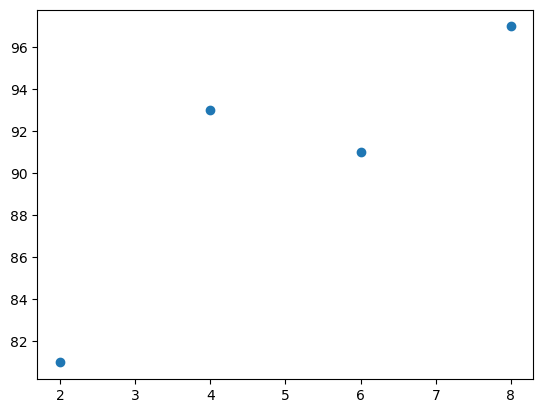

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 공부시간 X, 성적 y의 넘파이 배열 만들기
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

plt.scatter(x, y)
plt.show()

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


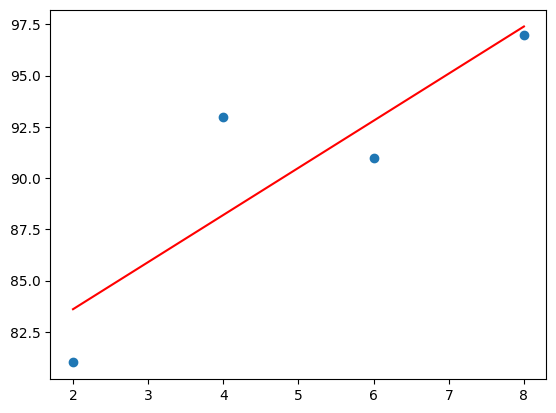

In [ ]:
# 기울기 a의 값과 절편 b의 값을 초기화
a, b = 0, 0

# 학습률 정하기
lr = 0.03

# 몇 번 반복될지 설정
epochs = 2001

# x값이 총 몇 개인지 세기
n = len(x)

# 경사하강법 시작
for i in range(epochs):
    # 예측값 구하기
    y_pred = a*x + b
    # error
    error = y - y_pred

    a_diff = (2/n) * sum(-x * (error))
    b_diff = (2/n) * sum(-(error))

    a = a - lr*a_diff
    b = b - lr*b_diff

    # 100번 반복할 때마다 그 시점의 a, b값 출력하기
    if i % 100 == 0:
        print('epoch=%.f, 기울기=%.04f, 절편=%.04f' %(i, a, b))

# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해서 그래프를 그린다.
y_pred = a*x + b

# 그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()

## 파이썬 코딩으로 확인하는 다중 선형 회귀

In [ ]:
# 독립변수가 2개 이상
x1 = np.array([2, 4, 6, 8]) # 공부시간
x2 = np.array([0, 4, 2, 3]) # 과외 수업 시간
y = np.array([81, 93, 91, 97]) # 성적

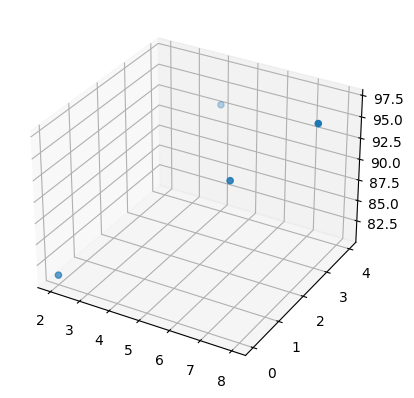

In [ ]:
# 데이터 분포 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [ ]:
# 기울기 a의 값과 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0

# 학습률 설정
lr = 0.01

# 몇 번 반복할지 결정
epochs = 2001

# x의 총 개수 확인
n = len(x1)

# 경사하강법 사용
for i in range(epochs): # 에폭 수만큼 반복
    # 예측값을 구하는 식 세우기
    y_pred = a1 * x1 + a2 * x2 + b
    # 실제 값과 비교한 오차를 error라고 지정
    error = y - y_pred

    # 오차 함수를 a1으로 편미분
    a1_diff = (2/n) * sum(-x1*(error))
    # 오차 함수를 a2으로 편미분
    a2_diff = (2/n) * sum(-x2*(error))
    # 오차 함수를 b으로 편미분
    b_diff = (2/n) * sum(-(error))

    # 학습률을 곱해 기존의 a1값을 업데이트
    a1 = a1 - lr*a1_diff
    # 학습률을 곱해 기존의 a2값을 업데이트
    a2 = a2 - lr*a2_diff
    # 학습률을 곱해 기존의 b값을 업데이트
    b = b - lr*b_diff

    # 100번 반복될 때마다 현재의 a1, a2, b의 값 출력
    if i % 100 == 0:
        print('epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f' %(i, a1, a2, b))

# 실제 점수와 예측 점수 출력
print('실제 점수 :', y)
print('예측 점수 :', y_pred)

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

## 텐서플로에서 실행하는 선형 회귀, 다중 선형 회귀 모델
* H(x) : 가설함수 / w : 가중치 / b : 편향
    * H(x) = wx + b
* 평균 제곱 오차 --> 손실 함수(loss function)
* 경사하강법 --> 옵티마이저 (optimizer)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

* Dense() 함수
    * 필요한 파라미터 : 출력 값의 개수, 입력될 변수의 개수(input_dim), 활성화 함수 (activation)
    * 활성화 함수 : 입력된 값을 다음 층으로 넘길 때 각 값을 어떻게 처리할지를 결정하는 함수
        * 딥러닝의 목적에 따라 다른 활성화 함수를 넣을 수 있음.
* model.compile()
    * 필요한 파라미터 : optimizer, loss
        * optimizer : 경사하강법 = 'sgd'
        * loss : 평균 제곱 오차 = 'mse'
* model.fit()
    * 필요한 파라미터 : 독립변수, 종속변수, 에폭

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step - loss: 8323.8115
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 2054.4861
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1128.3376
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 987.0031
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 960.9728
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 951.9117
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 945.3771
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 939.2471
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 933.2101
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 927.2198
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 921.2696
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 915.3580
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 909.4847
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 903.6496
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━

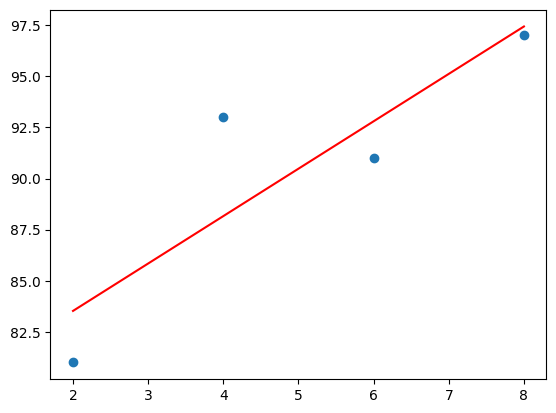

ValueError: Unrecognized data type: x=[7] (of type <class 'list'>)

In [ ]:
# 데이터 준비
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 모델 구축
model = Sequential()
# 출력값, 입력변수, 분석 방법에 맞게끔 모델을 설정한다.
model.add(Dense(1, input_dim=1, activation='linear')) # 단순선형회귀

# 오차수정을 위해 경사하강법을, 오차의 정도를 파악하기 위해 mse를 사용한다.
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복한다.
model.fit(x, y, epochs=2000)

# 예측 결과를 그래프로 나타내기
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()



In [ ]:
# 임의의 시간을 넣어 점수를 예측하는 모델을 테스트하기
hour = 7
prediction = model.predict(np.array([hour]))
print('%.f시간을 공부할 경우 예상 점수는 %.02f점입니다.' %(hour, prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
7시간을 공부할 경우 예상 점수는 95.12점입니다.


<ipython-input-24-9fe989f8b500>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%.f시간을 공부할 경우 예상 점수는 %.02f점입니다.' %(hour, prediction))


In [ ]:
## 다중선형회귀
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]]) # [학습시간, 과외시간]
y = np.array([81, 93, 91, 97])

# 모델 구축
model = Sequential()
# 출력값, 입력변수, 분석 방법에 맞게끔 모델을 설정한다.
model.add(Dense(1, input_dim=2, activation='linear')) # 단순선형회귀

# 오차수정을 위해 경사하강법을, 오차의 정도를 파악하기 위해 mse를 사용한다.
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복한다.
model.fit(x, y, epochs=2000)

Epoch 1/2000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 6794.4302
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1342.6561
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 953.7559
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 920.9612
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 913.2457
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 907.3282
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 901.5714
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 895.8597
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 890.1847
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 884.5459
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 878.9426
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 873.3749
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 867.8424
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 862.3451
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step -

In [ ]:
# 임의의 시간을 넣어 점수를 예측하는 모델을 테스트하기
hour = 7
private_class = 4

prediction = model.predict(np.array([[hour, private_class]]))
print('%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다.' %(hour, private_class, prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다.


<ipython-input-27-5c4cc6686197>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다.' %(hour, private_class, prediction))


# 예측 모델의 기본 원리
1. 로지스틱 회귀 정의
* 참(1)과 거짓(0) 사이를 구분하는 s자 형태의 선을 그려주는 작업
2. 시그모이드 함수
* 이 함수를 이용해 로지스틱 회귀를 풀어나갈 수 있음.
> y = 1 / (1 + e^-(ax+b))
* 결국, 구해야 하는 값 : ax+b
    * a의 값이 커지면 경사가 커지고, a의 값이 작아지면 경사가 작아진다.
    * b는 그래프의 좌우 이동을 의미한다.
3. 오차공식
* 평균제곱오차를 사용할 수 없다. 따라서, 시그모이드의 특징을 이용해 오차를 구해야 한다.
    * 로그 함수를 이용하면 해결된다. ==> **교차 엔트로피 오차** 함수

## 텐서플로에서 실행하는 로지스틱 회귀 모델

In [ ]:
## 필요한 라이브러리 로드
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2654
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2654
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2653
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2653
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2652
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2652
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2651
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2651
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2650
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2650
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2649
Epoch 2512/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2649
Epoch 2513/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2648
Epoch 2514/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2648

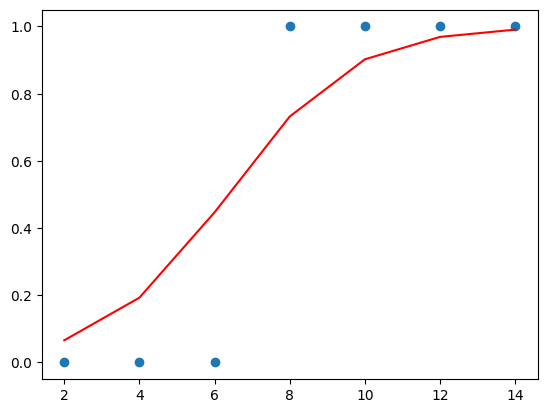

In [ ]:
## 데이터 준비
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

# 모델 구축
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위해 'binary_crossentropy'로 설정
model.compile(optimizer='sgd', loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

# 그래프 확인
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

In [3]:
# 임의의 학습시간을 집어넣어 합격 예상 확률을 예측하기
hour = 7
prediction = model.predict(np.array([hour]))
print('%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다.' %(hour, prediction*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
7시간을 공부할 경우, 합격 예상 확률은 59.8%입니다.


<ipython-input-3-7d2bc5e4b17c>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다.' %(hour, prediction*100))
